# Jaklyn Soler

# Module 4 Project

# Strategic Summary

### Objective

It is April 2018 and I have been tasked with recommending 5 top zip codes to a real estate investment company. My responsibilities include analyzing risk, profit, and exploring other concepts independently. 

### Strategic Data Selection

In order to select the area, I defined the best strategy as long term property rentals. I defined the best area as the northeast due to the low rental vacancy rate. One common strategy real estate investors employ is seeking out probate properties and due to the high amount of baby boomers in New York, it is likely that there will be a high number of properties in the probate system over the next 20 years. Therefore, New York was selected as the best state for investments. An assumption that the real estate investment company has a large amount of capital was assumed in order to select the parameters of price for the properties. Properties between 500000 dollars and 700000 dollars were selected as they will have a high amount of value which means high rental prices and simletaneously allow the investor to have multiple properties so that having a problem with one tenant wont put a halt on cash flow. 

### Return on Investment 

After these decisions were made, I analysed percentage of roi on value of the home. Average monthly rental amount falls between .8% and 1.1% of the property value. By having a more competitive rental price, property owners can be more selective in their tenant evaluation since it will attract more interested renters. In light of this strategy, I selected the monthly rental amount of .9% meaning that in a 12 month period, the tenant would pay 10.8% of the property value. Not accounting for property maintenance and vacancy, every property would pay for its initial amount in 9 years and four months.

### Layout
PART ONE: Introduction & Zipcode Analysis
PART TWO: Zipcode Analysis
PART THREE: Zipcode Analysis
PART FOUR: Final Analysis & Conclusion

### Objective

It is April 2018 and I have been tasked with recommending 5 top zip codes to a real estate investment company. My responsibilities include analyzing risk, profit, and exploring other concepts independently. 

### Strategic Data Selection

In order to select the area, I defined the best strategy as long term property rentals. I defined the best area as the northeast due to the low rental vacancy rate. One common strategy real estate investors employ is seeking out probate properties and due to the high amount of baby boomers in New York, it is likely that there will be a high number of properties in the probate system over the next 20 years. Therefore, New York was selected as the best state for investments. An assumption that the real estate investment company has a large amount of capital was assumed in order to select the parameters of price for the properties. Properties between 500000 dollars and 700000 dollars were selected as they will have a high amount of value which means high rental prices and simletaneously allow the investor to have multiple properties so that having a problem with one tenant wont put a halt on cash flow. 

### Return on Investment 

After these decisions were made, I analysed percentage of roi on value of the home. Average monthly rental amount falls between .8% and 1.1% of the property value. By having a more competitive rental price, property owners can be more selective in their tenant evaluation since it will attract more interested renters. In light of this strategy, I selected the monthly rental amount of .9% meaning that in a 12 month period, the tenant would pay 10.8% of the property value. Not accounting for property maintenance and vacancy, every property would pay for its initial amount in 9 years and four months.

### Layout
 - PART ONE: Introduction & Zipcode Analysis
 - PART TWO: Zipcode Analysis
 - PART THREE: Zipcode Analysis
 - PART FOUR: Final Analysis & Conclusion

# Loading Zillow Data

### Relevant packages can be imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import xlrd
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.metrics import r2_score
from pmdarima.arima import ndiffs
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.tsa.stattools import adfuller

### ACF & PACF Function

In [2]:
def plot_acf_pacf(ts, figsize=(10,8), lags = 24, zipcode = 'add'):
    
    fig,ax = plt.subplots(nrows=3,
                         figsize = figsize)
    
    #plot time series
    ts.plot(ax=ax[0])
    
    #plot acf, pacf
    plot_acf(ts,ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags)
    fig.tight_layout()
    
    fig.suptitle(f'Zipcode: {zipcode}',y=1.1, fontsize=20)
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(min_n_ticks=lags, integer = True))
        a.xaxis.grid()
    return fig,ax


### Truncating can be removed for better analysis. 

In [4]:
pd.set_option('display.max_columns', None) #prevents trailing elipses
pd.set_option('display.max_rows', None)

# Unpickling queens_grouped & results Dataframes

In [5]:
queens_grouped = pd.read_pickle("./queens_grouped.pkl")

In [7]:
results = pd.read_pickle("./new_results.pkl")

# 11427

In [8]:
four_two_seven = queens_grouped.loc[11427]

In [9]:
four_two_seven.tail()

,value
time,
2017-12-31,576000.0
2018-01-31,575700.0
2018-02-28,576600.0
2018-03-31,581400.0
2018-04-30,587700.0


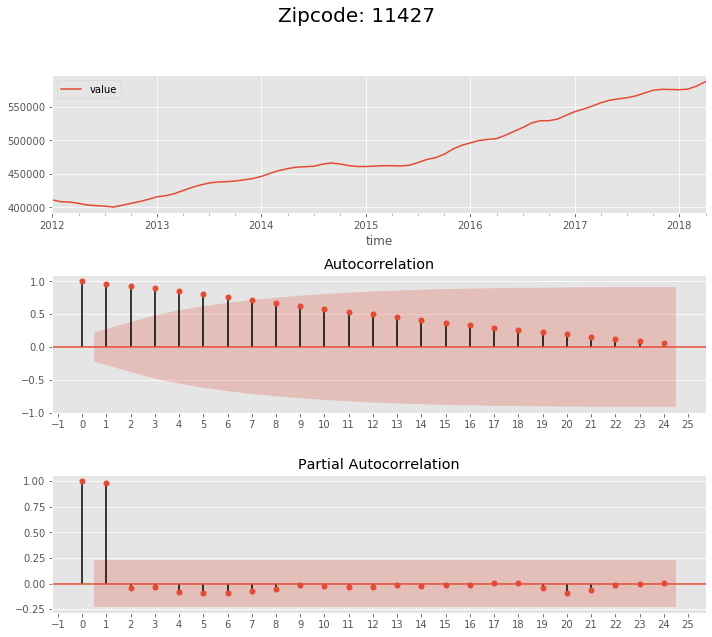

In [10]:
plot_acf_pacf(four_two_seven, zipcode = '11427')
plt.show()

### Decompose Time Series

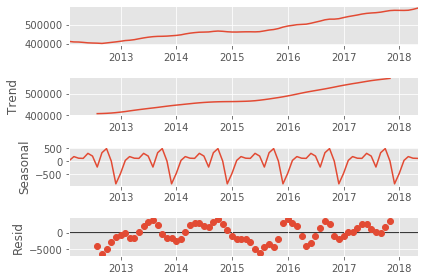

In [11]:
decompose_result = seasonal_decompose(four_two_seven, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

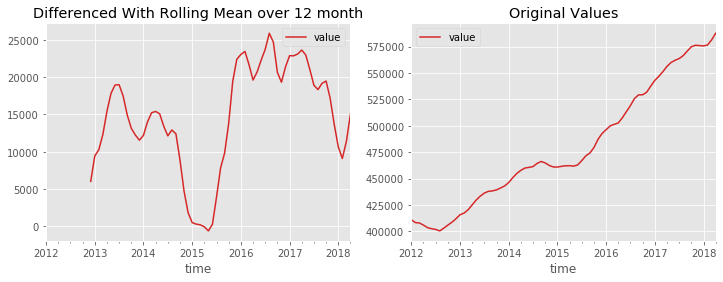

In [12]:
rolling_mean = four_two_seven.rolling(window = 12).mean()
four_two_seven_rolled_detrended = four_two_seven - rolling_mean

ax1 = plt.subplot(121)
four_two_seven_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
four_two_seven.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

In [13]:
dftest = adfuller(four_two_seven_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.9060101685975994
2. P-Value :  0.3292390416283657
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 57
5. Critical Values :
	 1% :  -3.5506699942762414
	 5% :  -2.913766394626147
	 10% :  -2.5946240473991997


### Using Differencing with Mean Rolled Time Series for Seasonality

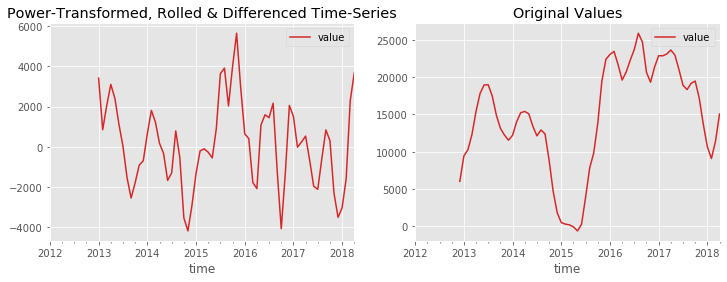

In [14]:
four_two_seven_rolled_detrended_diff = four_two_seven_rolled_detrended - four_two_seven_rolled_detrended.shift()

ax1 = plt.subplot(121)
four_two_seven_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
four_two_seven_rolled_detrended.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Retesting with the Dicky-Fuller Test

In [15]:
dftest = adfuller(four_two_seven_rolled_detrended_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.9709994932380526
2. P-Value :  0.037692878221613935
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 58
5. Critical Values :
	 1% :  -3.548493559596539
	 5% :  -2.912836594776334
	 10% :  -2.594129155766944


In [16]:
four_two_seven = four_two_seven_rolled_detrended_diff

### SARIMAX Modeling: Parameter Selection

In [17]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [18]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(four_two_seven,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - SARIMAX

In [20]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [21]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (2, 2, 2), 'pdqs': (2, 2, 2, 12), 'aic': 420.8443674532897}

In [22]:
best_params['pdq']

(2, 2, 2)

In [23]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(four_two_seven, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 12)   Log Likelihood                -201.422
Date:                            Mon, 21 Dec 2020   AIC                            420.844
Time:                                    21:34:38   BIC                            431.064
Sample:                                01-31-2012   HQIC                           423.415
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1048      0.371     -0.282      0.778      -0.833       0.623
ar.L2         -0.5994      0.418     -1.433      0.152      -1.419       0.220
ma.L1         -0.1055      2.771     -0.038      0.970      -5.536       5.325
ma.L2         -0.8965      2.632     -0.341      0.733      -6.054       4.261
ar.S.L12      -0.6859      0.807     -0.850      0.396      -2.268       0.897
ar.S.L24      -0.6943      0.704     -0.986      0.324      -2.074       0.685
ma.S.L12      -1.9396      2.694     -0.720      0.472      -7.220       3.341
ma.S.L24       1.2076      1.769      0.683      0.495      -2.259       4.674
sigma2      9.542e+05   2.69e-06   3.54e+11      0.000    9.54e+05    9.54e+05
===================================================================================
Ljung-Box (Q):                       29.57   Jarque-Bera (JB):                11.82
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               5.18   Skew:                             1.45
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.78e+28. Standard errors may be unstable.
"""

### Plot Diagnostics

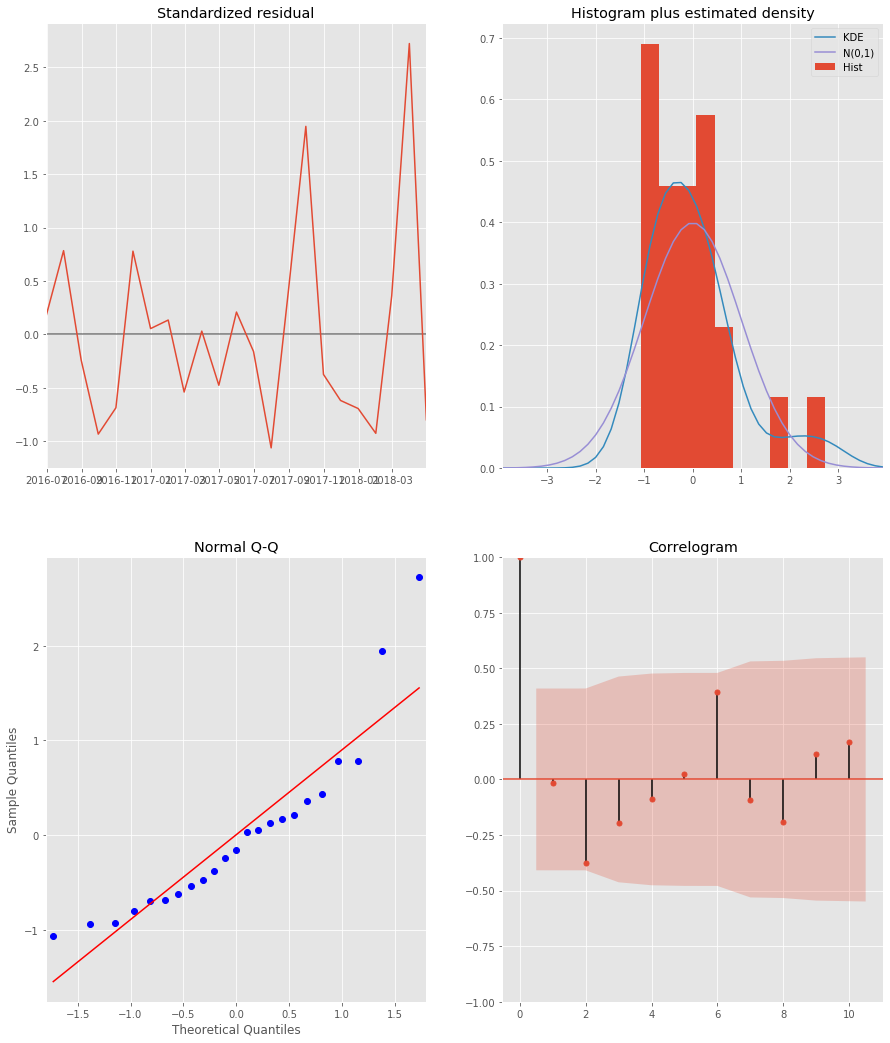

In [24]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [25]:
four_two_seven[60:]

,value
time,
2017-01-31,1508.333333
2017-02-28,-16.666667
2017-03-31,241.666667
2017-04-30,533.333333
2017-05-31,-666.666667
2017-06-30,-1958.333333
2017-07-31,-2108.333333
2017-08-31,-583.333333
2017-09-30,841.666667


In [26]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

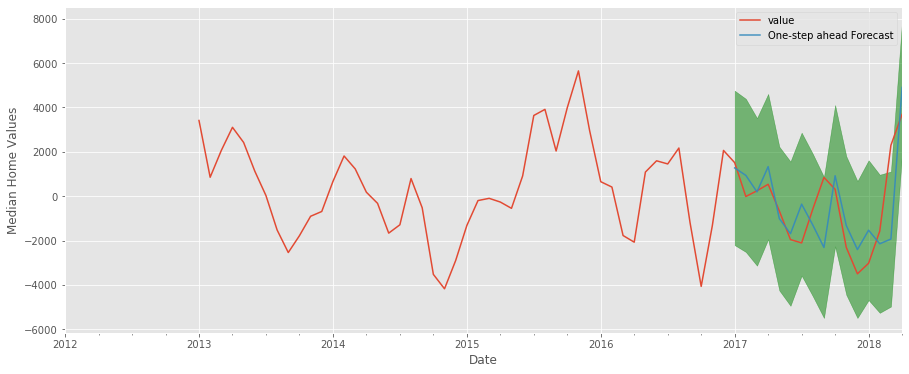

In [27]:

rcParams['figure.figsize'] = 15, 6

ax = four_two_seven['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [28]:
val_forecasted = pred.predicted_mean
val_truth = four_two_seven.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2482651.75


### Model Validation - Dynamic Forecasting

In [29]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()


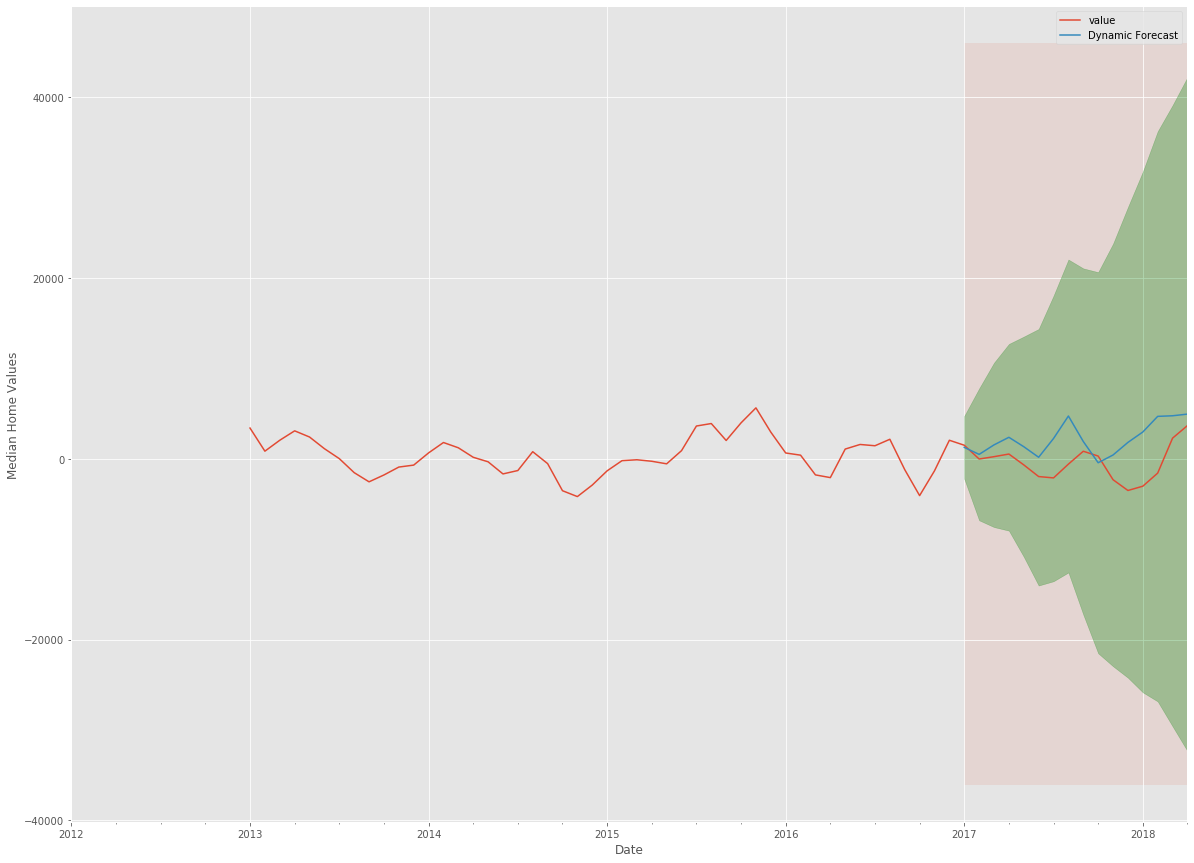

In [30]:
ax = four_two_seven['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [31]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = four_two_seven.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 11378058.39


### Visualizing Confidence Interval

In [32]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,-2286.098963,3596.109622,655.005330
2018-06-30,-4682.493773,7498.995028,1408.250627
2018-07-31,-376.273384,14384.895150,7004.310883
2018-08-31,890.139096,17296.089706,9093.114401
2018-09-30,-5148.330217,13772.156986,4311.913384


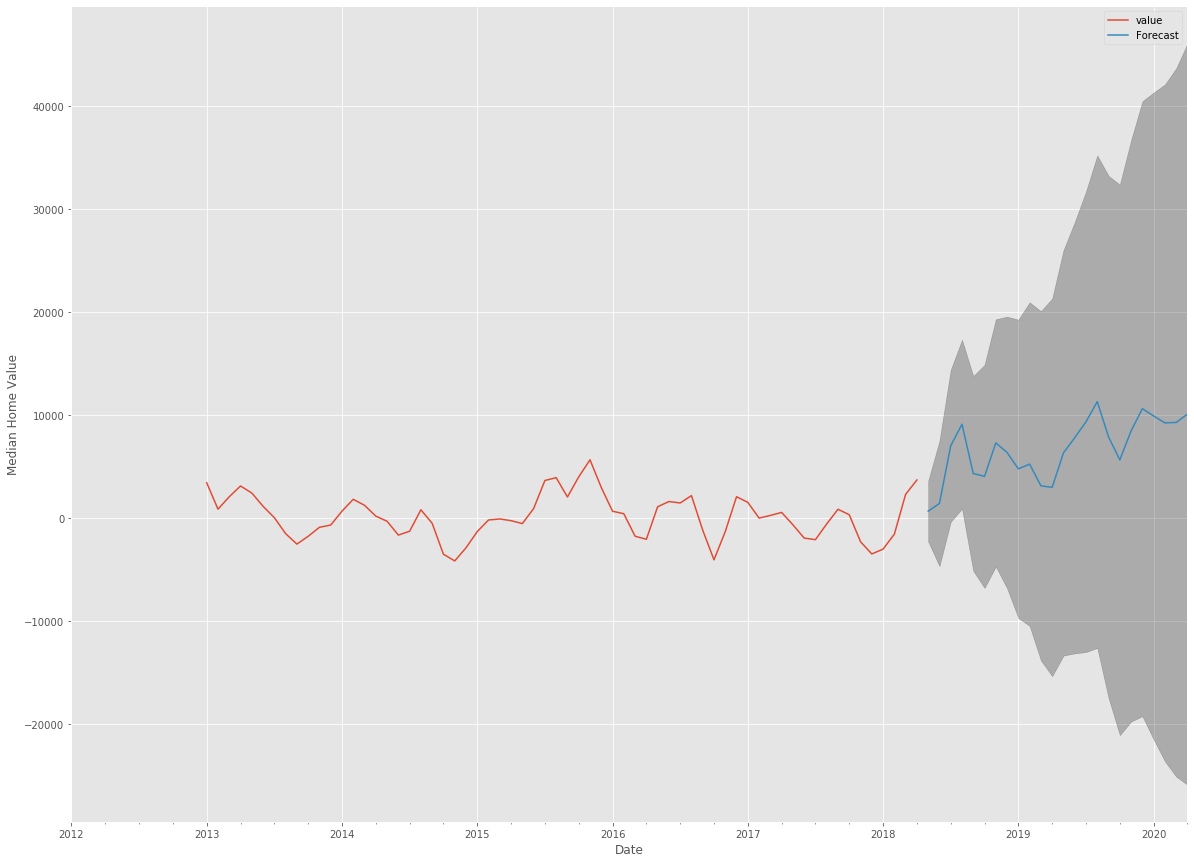

In [33]:
ax = four_two_seven.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI) Percentage

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [34]:
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ cost * 100

roi


,lower value,upper value,mean
2018-05-31,-449.019902,449.019902,0.000000
2018-06-30,-814.878729,1044.875421,114.998346
2018-07-31,-157.445851,2096.149328,969.351739
2018-08-31,35.897993,2540.602896,1288.250444
2018-09-30,-885.998218,2002.602278,558.302030
2018-10-31,-1138.046256,2169.025506,515.489625
2018-11-30,-820.706968,2844.591713,1011.942373
2018-12-31,-1143.735606,2882.986510,869.625452
2019-01-31,-1583.032927,2838.552200,627.759637
2019-02-28,-1701.108274,3095.395001,697.143364


# Results Dataframe

In [35]:
results.AIC[8] = 420.84
results.Investment_Required[8] = 587700
results.ROI_Percentage[8] = 1438
results.head(10)

,Zipcode,AIC,Investment_Required,ROI_Percentage
0,11385,419,657500,211
1,11414,431,669800,24
2,11378,415,696100,-25
3,11421,431,547100,24
4,11418,425,611500,481
5,11423,400,533400,107
6,11369,425,675700,481
7,11417,406,510000,-82
8,11427,420,587700,1438715
9,11426,1,1,1


# 11426

In [36]:
four_two_six = queens_grouped.loc[11426]

In [37]:
four_two_six.tail()

,value
time,
2017-12-31,585200.0
2018-01-31,586700.0
2018-02-28,591500.0
2018-03-31,598900.0
2018-04-30,604400.0


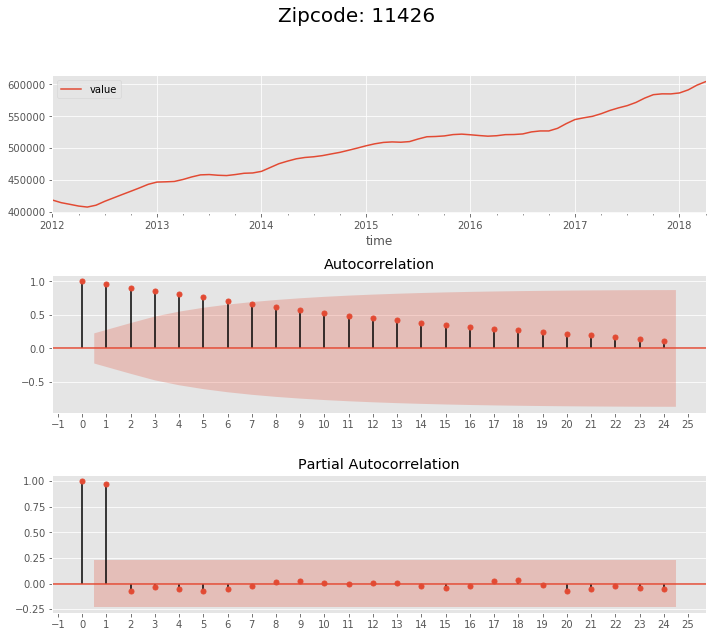

In [38]:
plot_acf_pacf(four_two_six, zipcode = '11426')
plt.show()

### Decompose Time Series

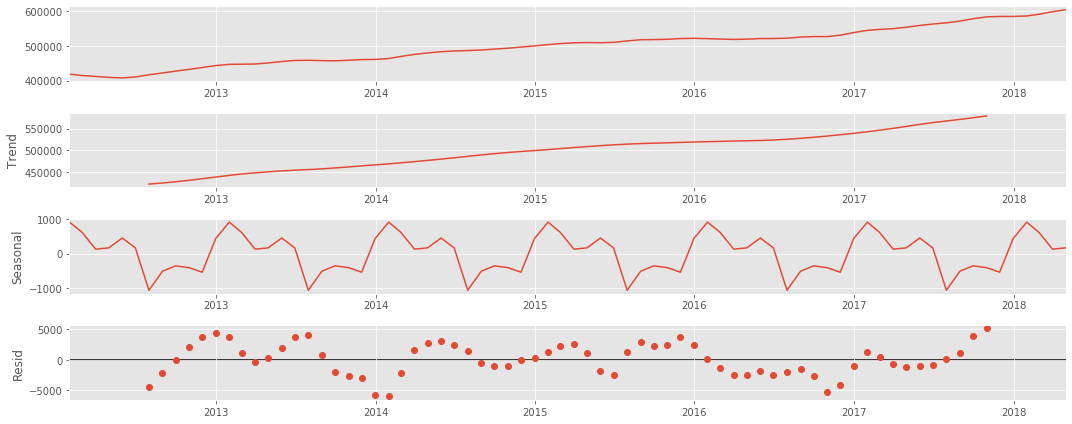

In [39]:
decompose_result = seasonal_decompose(four_two_six, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

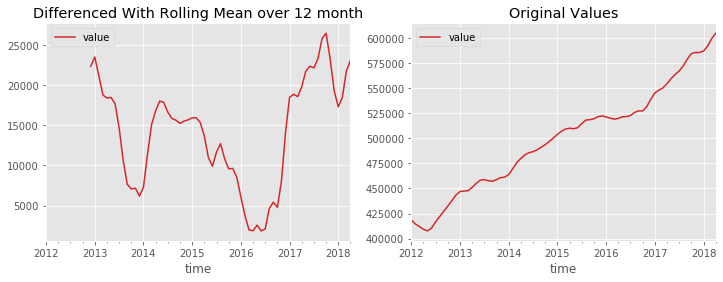

In [40]:
rolling_mean = four_two_six.rolling(window = 12).mean()
four_two_six_rolled_detrended = four_two_six - rolling_mean

ax1 = plt.subplot(121)
four_two_six_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
four_two_six.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

In [41]:
dftest = adfuller(four_two_six_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.3762641718891118
2. P-Value :  0.14854803327068622
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 56
5. Critical Values :
	 1% :  -3.552928203580539
	 5% :  -2.9147306250000002
	 10% :  -2.595137155612245


### Using Differencing with Mean Rolled Time Series for Seasonality

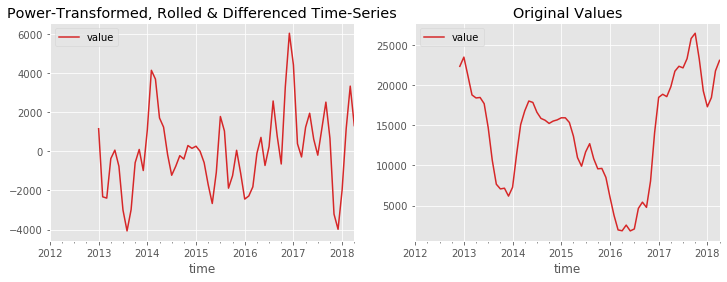

In [42]:
four_two_six_rolled_detrended_diff = four_two_six_rolled_detrended - four_two_six_rolled_detrended.shift()

ax1 = plt.subplot(121)
four_two_six_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
four_two_six_rolled_detrended.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Retesting with the Dicky-Fuller Test

In [43]:
dftest = adfuller(four_two_six_rolled_detrended_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.9079440357305604
2. P-Value :  0.04443198228265718
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 55
5. Critical Values :
	 1% :  -3.5552728880540942
	 5% :  -2.9157312396694217
	 10% :  -2.5956695041322315


In [44]:
four_two_six = four_two_six_rolled_detrended_diff

### SARIMAX Modeling: Parameter Selection

In [45]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [46]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(four_two_six,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - SARIMAX

In [47]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [48]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (2, 2, 2), 'pdqs': (1, 2, 2, 12), 'aic': 418.64068098335486}

In [49]:
best_params['pdq']

(2, 2, 2)

In [50]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(four_two_six, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(2, 2, 2)x(1, 2, 2, 12)   Log Likelihood                -201.320
Date:                            Mon, 21 Dec 2020   AIC                            418.641
Time:                                    21:48:50   BIC                            427.725
Sample:                                01-31-2012   HQIC                           420.925
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2286      0.252      0.907      0.364      -0.265       0.722
ar.L2         -0.8216      0.258     -3.188      0.001      -1.327      -0.316
ma.L1         -0.3303      3.870     -0.085      0.932      -7.915       7.255
ma.L2         -0.6722      2.844     -0.236      0.813      -6.246       4.901
ar.S.L12      -0.5560      0.377     -1.476      0.140      -1.294       0.182
ma.S.L12      -2.2479      4.446     -0.506      0.613     -10.962       6.467
ma.S.L24       1.6018      2.715      0.590      0.555      -3.720       6.924
sigma2       7.98e+05   4.63e-06   1.72e+11      0.000    7.98e+05    7.98e+05
===================================================================================
Ljung-Box (Q):                       25.65   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.27   Prob(JB):                         0.89
Heteroskedasticity (H):               3.43   Skew:                             0.21
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+28. Standard errors may be unstable.
"""

### Plot Diagnostics

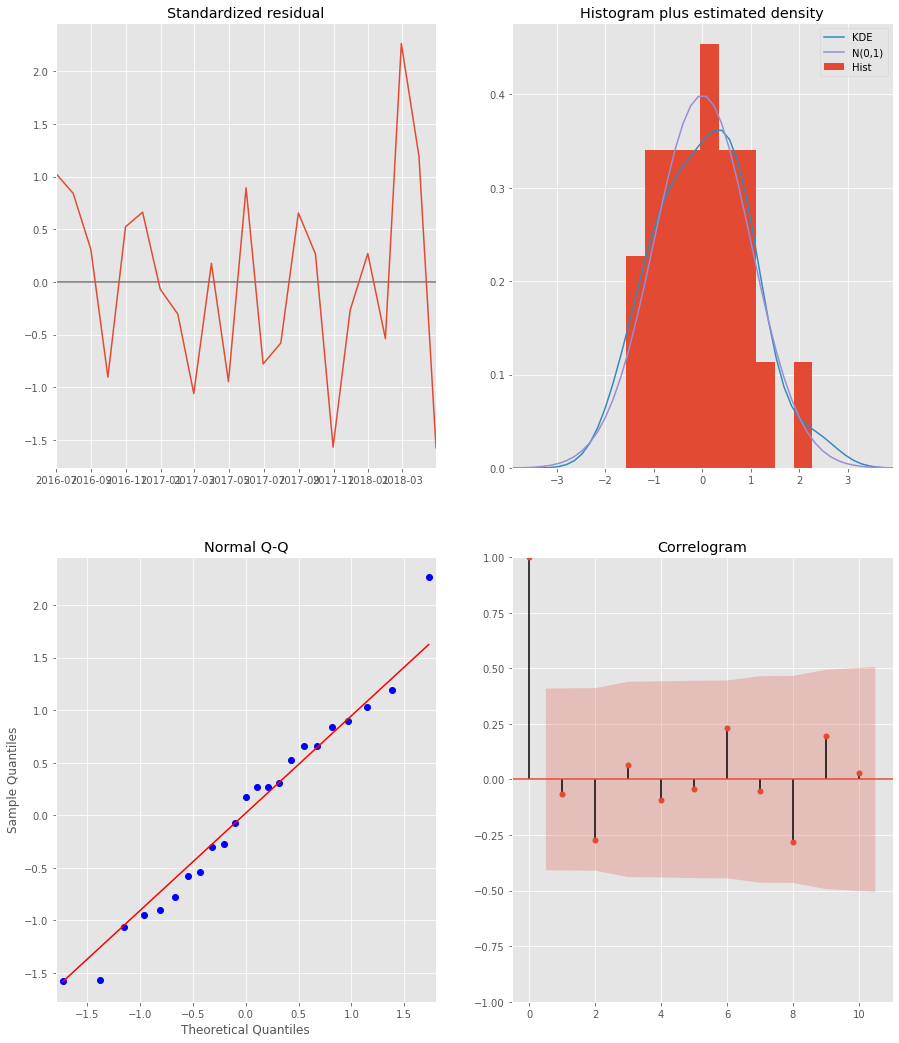

In [51]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [52]:
four_two_six[60:]

,value
time,
2017-01-31,4408.333333
2017-02-28,383.333333
2017-03-31,-291.666667
2017-04-30,1225.000000
2017-05-31,1941.666667
2017-06-30,616.666667
2017-07-31,-200.000000
2017-08-31,1150.000000
2017-09-30,2508.333333


In [53]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

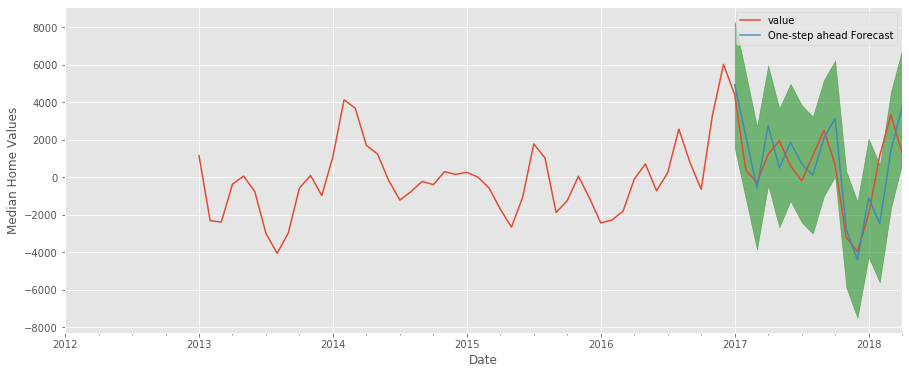

In [54]:

rcParams['figure.figsize'] = 15, 6

ax = four_two_six['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [55]:
val_forecasted = pred.predicted_mean
val_truth = four_two_six.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2611125.32


### Model Validation - Dynamic Forecasting

In [56]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()


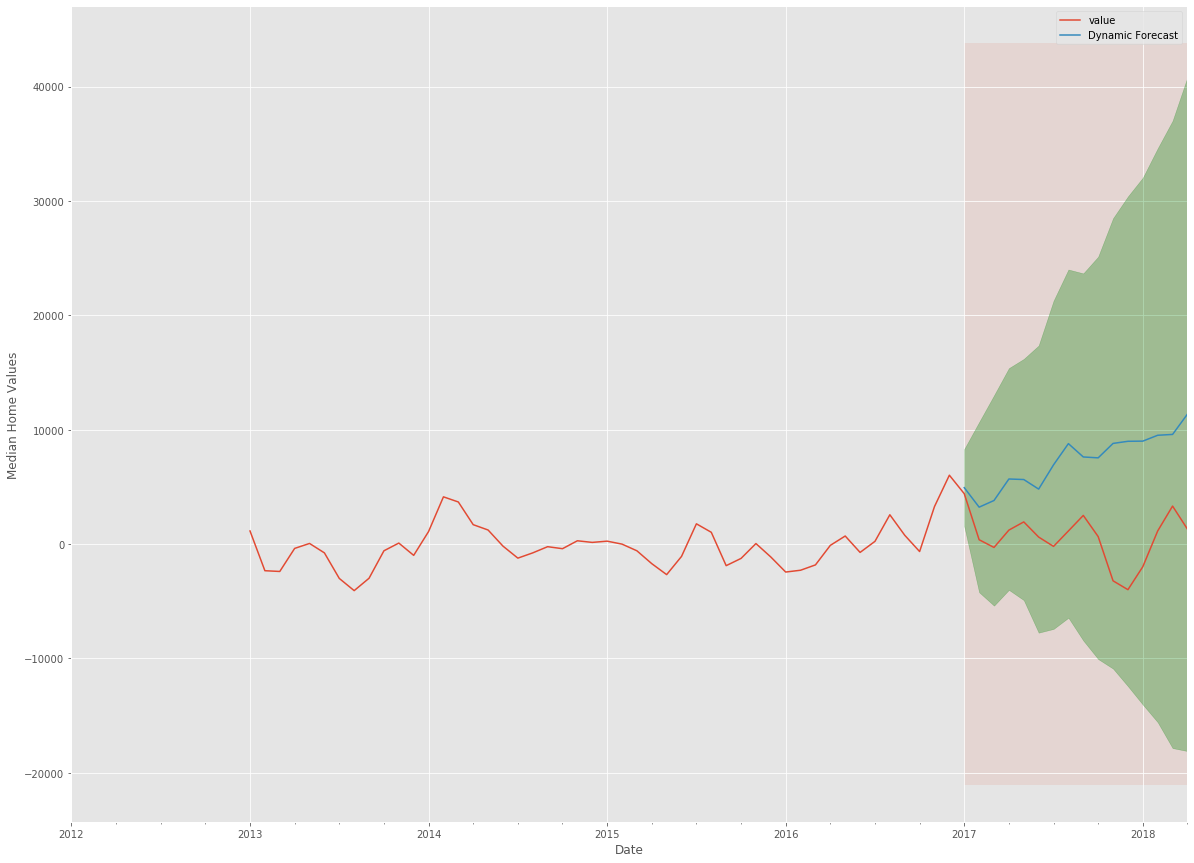

In [57]:
ax = four_two_six['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [58]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = four_two_six.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 56415892.11


### Visualizing Confidence Interval

In [59]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,-4765.140073,1290.812113,-1737.163980
2018-06-30,-7073.410884,6162.194240,-455.608322
2018-07-31,-2822.816060,13221.445849,5199.314895
2018-08-31,-2033.661819,14665.112999,6315.725590
2018-09-30,-8375.632070,9483.171970,553.769950


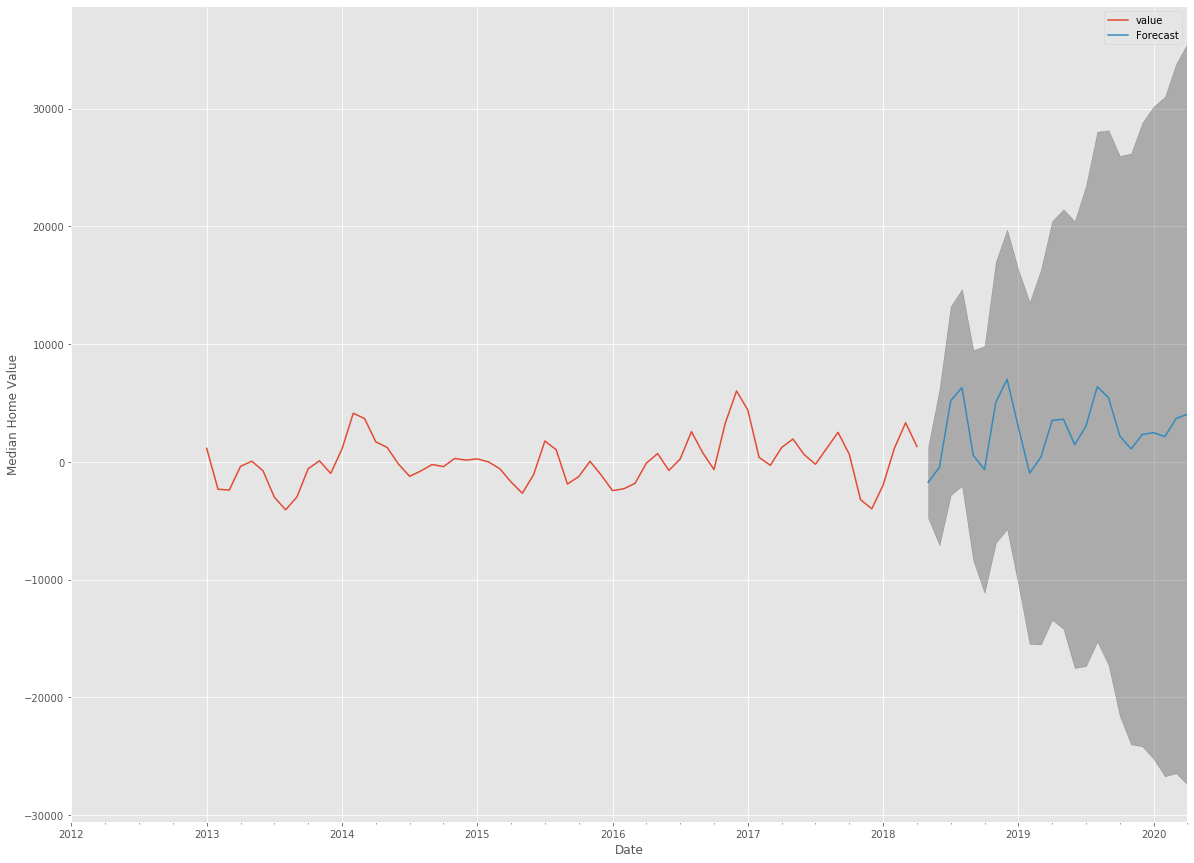

In [60]:
ax = four_two_six.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI) Percentage

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [61]:
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ cost * 100

roi


,lower value,upper value,mean
2018-05-31,174.305715,-174.305715,-0.000000
2018-06-30,307.181531,-454.727263,-73.772866
2018-07-31,62.495659,-861.093714,-399.299027
2018-08-31,17.067925,-944.198542,-463.565309
2018-09-30,382.144010,-645.899643,-131.877817
2018-10-31,540.380414,-665.858239,-62.738913
2018-11-30,296.216151,-1078.294711,-391.039280
2018-12-31,228.342914,-1235.338624,-503.497855
2019-01-31,500.592548,-1039.190424,-269.298938
2019-02-28,790.014173,-880.176415,-45.081121


# Results Dataframe

In [63]:
results.AIC[9] = 418.64
results.Investment_Required[9] = 604400
results.ROI_Percentage[9] = -333.62
results.head(11)

,Zipcode,AIC,Investment_Required,ROI_Percentage
0,11385,419,657500,211
1,11414,431,669800,24
2,11378,415,696100,-25
3,11421,431,547100,24
4,11418,425,611500,481
5,11423,400,533400,107
6,11369,425,675700,481
7,11417,406,510000,-82
8,11427,420,587700,1438715
9,11426,418,604400,-333


# 11428

In [64]:
four_two_eight = queens_grouped.loc[11428]

In [65]:
four_two_eight.tail()

,value
time,
2017-12-31,507200.0
2018-01-31,509500.0
2018-02-28,511900.0
2018-03-31,518500.0
2018-04-30,526100.0


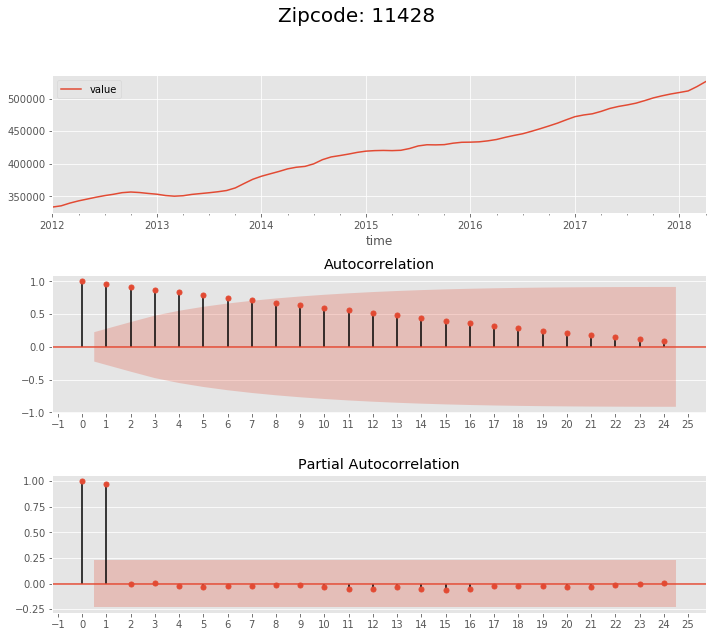

In [66]:
plot_acf_pacf(four_two_eight, zipcode = '11428')
plt.show()

### Decompose Time Series

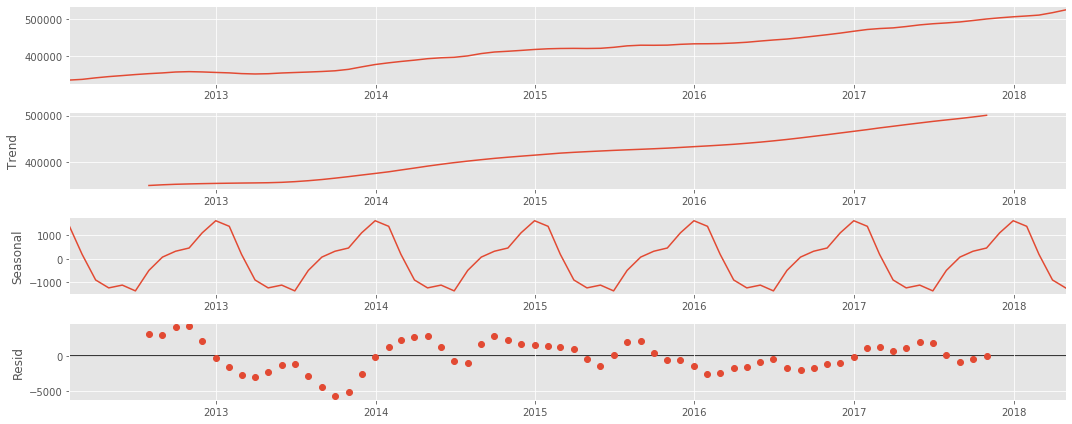

In [67]:
decompose_result = seasonal_decompose(four_two_eight, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

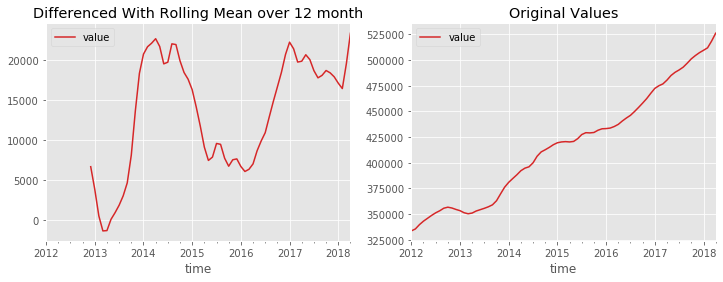

In [68]:
rolling_mean = four_two_eight.rolling(window = 12).mean()
four_two_eight_rolled_detrended = four_two_eight - rolling_mean

ax1 = plt.subplot(121)
four_two_eight_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
four_two_eight.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

In [69]:
dftest = adfuller(four_two_eight_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.172469102655588
2. P-Value :  0.021634613196359398
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


In [70]:
four_two_eight = four_two_eight_rolled_detrended

### SARIMAX Modeling: Parameter Selection

In [71]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [72]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(four_two_eight,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - ARIMA

In [73]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [74]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (2, 2, 2), 'pdqs': (2, 2, 2, 12), 'aic': 400.7993955518231}

In [75]:
best_params['pdq']

(2, 2, 2)

In [76]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(four_two_eight, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 12)   Log Likelihood                -191.400
Date:                            Mon, 21 Dec 2020   AIC                            400.799
Time:                                    21:58:56   BIC                            411.019
Sample:                                01-31-2012   HQIC                           403.370
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7748      0.244      3.175      0.001       0.297       1.253
ar.L2         -1.0581      0.352     -3.008      0.003      -1.747      -0.369
ma.L1         -1.2732      0.997     -1.277      0.202      -3.228       0.681
ma.L2          1.0030      1.625      0.617      0.537      -2.183       4.189
ar.S.L12      -0.8561      0.069    -12.358      0.000      -0.992      -0.720
ar.S.L24      -0.4915      0.256     -1.918      0.055      -0.994       0.011
ma.S.L12      -0.8421      0.445     -1.891      0.059      -1.715       0.031
ma.S.L24       0.7098      1.882      0.377      0.706      -2.979       4.399
sigma2      5.056e+05   4.38e-06   1.15e+11      0.000    5.06e+05    5.06e+05
===================================================================================
Ljung-Box (Q):                       29.45   Jarque-Bera (JB):                 1.32
Prob(Q):                              0.13   Prob(JB):                         0.52
Heteroskedasticity (H):               1.10   Skew:                            -0.54
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.3e+27. Standard errors may be unstable.
"""

### Plot Diagnostics

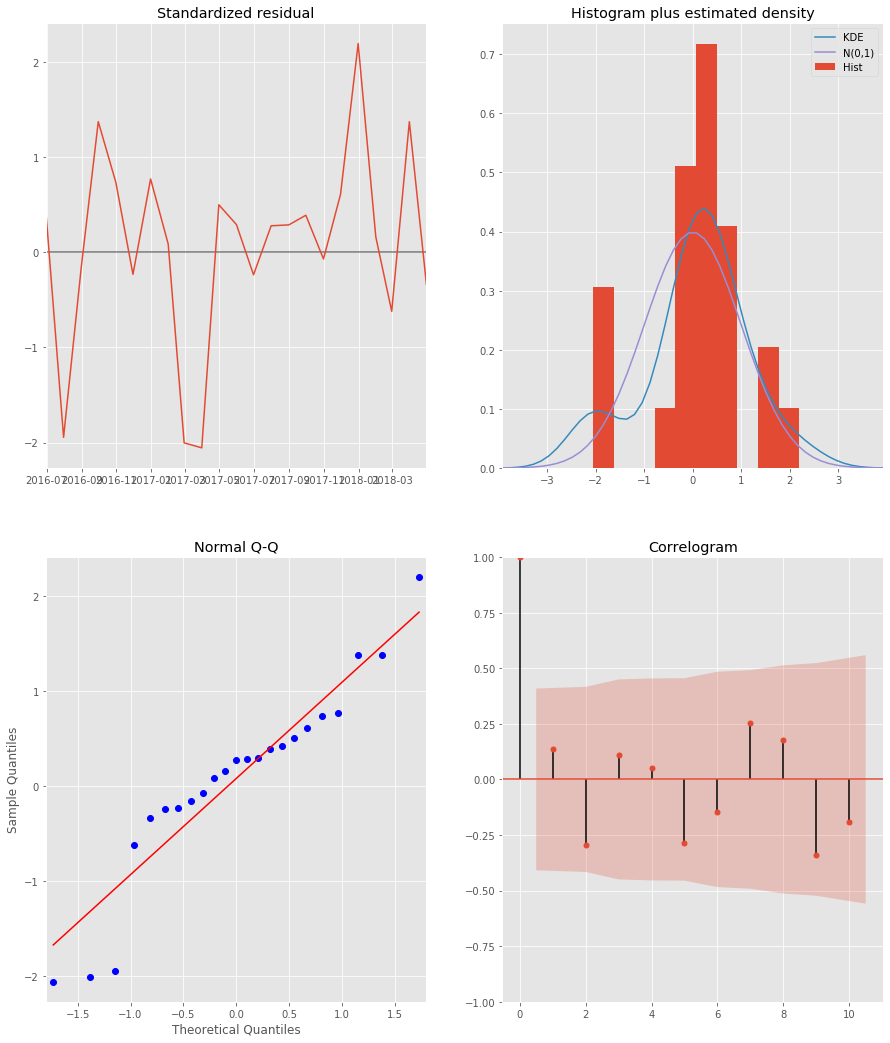

In [77]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [78]:
four_two_eight[60:]

,value
time,
2017-01-31,22283.333333
2017-02-28,21450.000000
2017-03-31,19791.666667
2017-04-30,19900.000000
2017-05-31,20708.333333
2017-06-30,20100.000000
2017-07-31,18716.666667
2017-08-31,17816.666667
2017-09-30,18125.000000


In [79]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

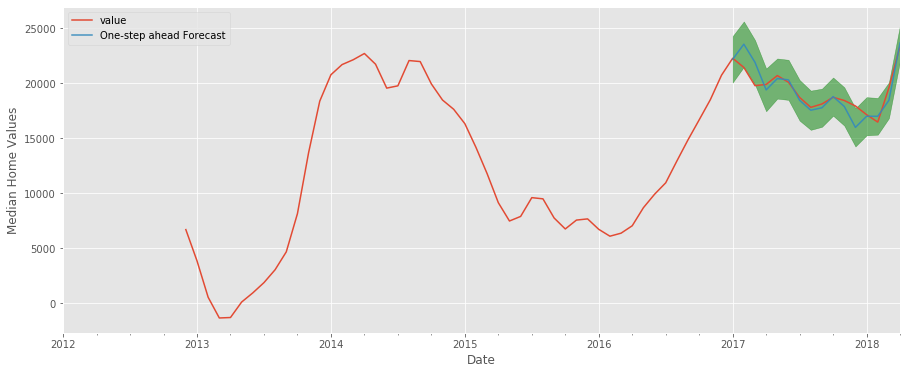

In [80]:

rcParams['figure.figsize'] = 15, 6

ax = four_two_eight['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [81]:
val_forecasted = pred.predicted_mean
val_truth = four_two_eight.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 960433.59


### Model Validation - Dynamic Forecasting

In [82]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()


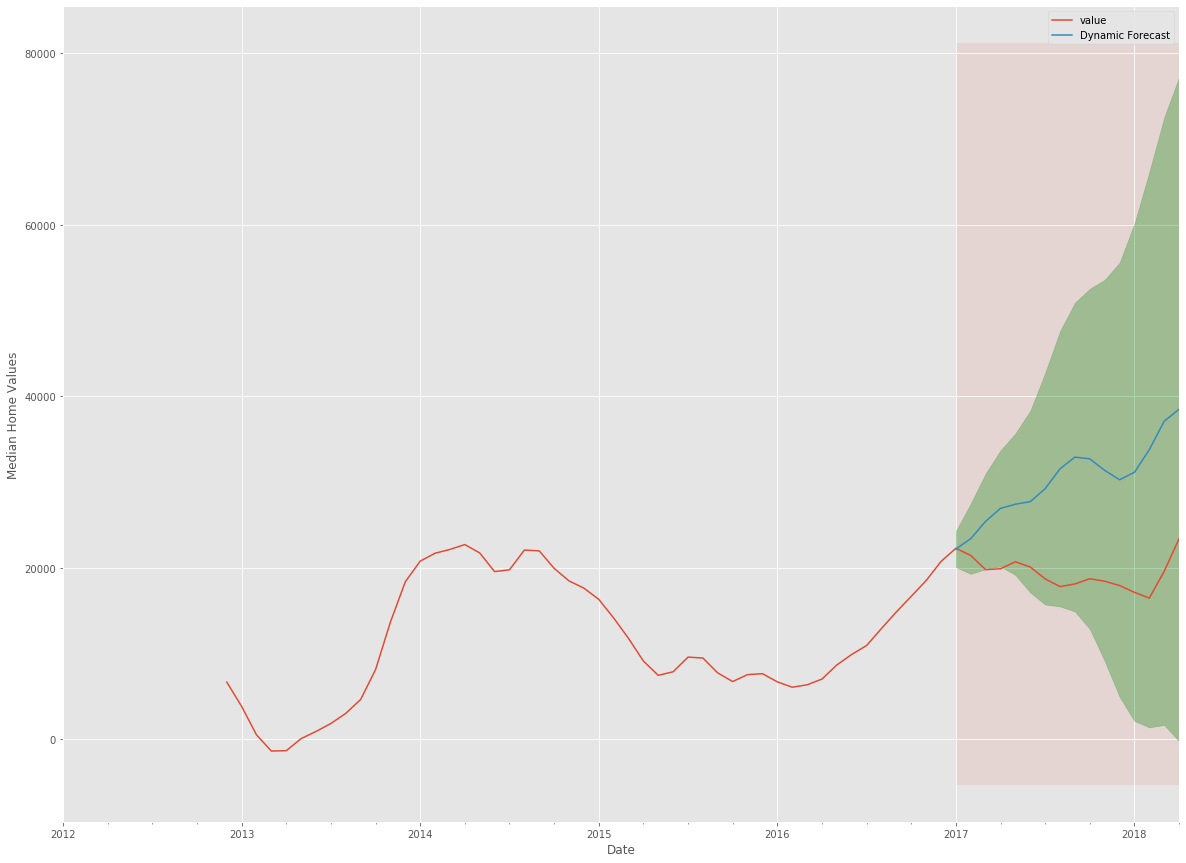

In [83]:
ax = four_two_eight['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [84]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = four_two_eight.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 140569459.19


### Visualizing Confidence Interval

In [85]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,25380.365966,28615.063801,26997.714883
2018-06-30,25864.122825,31937.323626,28900.723226
2018-07-31,25593.376649,33683.318038,29638.347344
2018-08-31,27484.340315,37408.126394,32446.233355
2018-09-30,32122.151924,44913.343049,38517.747486


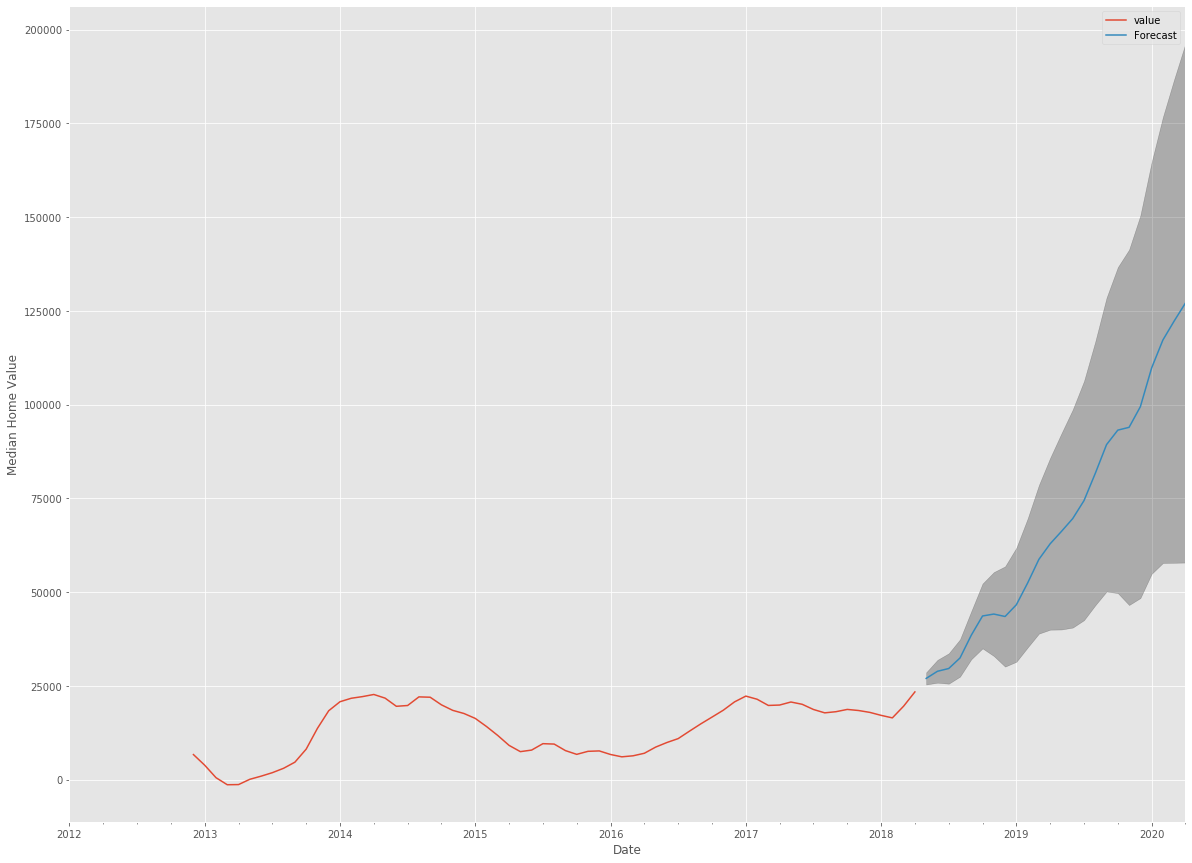

In [86]:
ax = four_two_eight.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI) Percentage

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [87]:
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ cost * 100

roi


,lower value,upper value,mean
2018-05-31,-5.990688,5.990688,0.000000
2018-06-30,-4.198844,18.296396,7.048776
2018-07-31,-5.201693,24.763589,9.780948
2018-08-31,1.802469,38.560343,20.181406
2018-09-30,18.981003,66.359795,42.670399
2018-10-31,29.660551,93.675184,61.667867
2018-11-30,22.152856,104.977925,63.565390
2018-12-31,11.663280,110.642579,61.152929
2019-01-31,16.469010,129.051963,72.760486
2019-02-28,30.571111,157.902038,94.236574


# Results Dataframe

In [91]:
results.AIC[10] = 400.79
results.Investment_Required[10] = 526100
results.ROI_Percentage[10] = 370.76
results.head(12)

,Zipcode,AIC,Investment_Required,ROI_Percentage
0,11385,419,657500,211
1,11414,431,669800,24
2,11378,415,696100,-25
3,11421,431,547100,24
4,11418,425,611500,481
5,11423,400,533400,107
6,11369,425,675700,481
7,11417,406,510000,-82
8,11427,420,587700,1438715
9,11426,418,604400,-333


# 11004

In [92]:
zero_zero_four = queens_grouped.loc[11004]

In [93]:
zero_zero_four.tail()

,value
time,
2017-12-31,619800.0
2018-01-31,617700.0
2018-02-28,620200.0
2018-03-31,627200.0
2018-04-30,634300.0


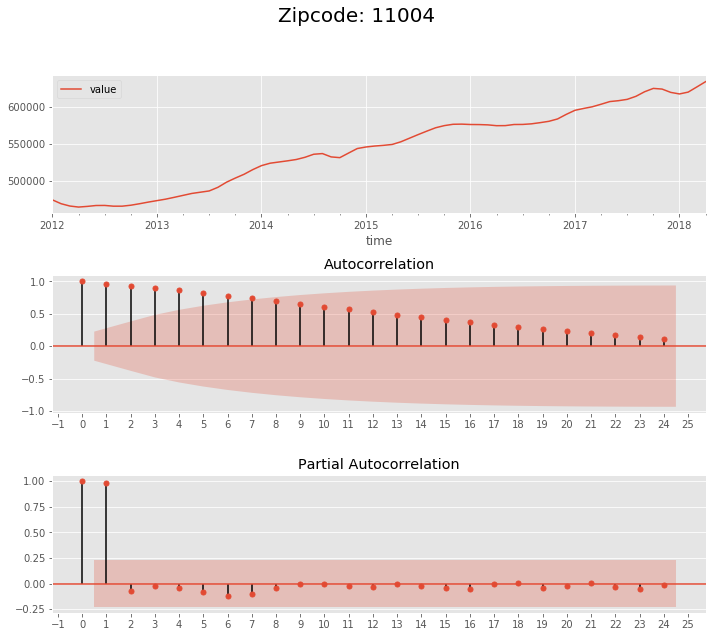

In [94]:
plot_acf_pacf(zero_zero_four, zipcode = '11004')
plt.show()

### Decompose Time Series

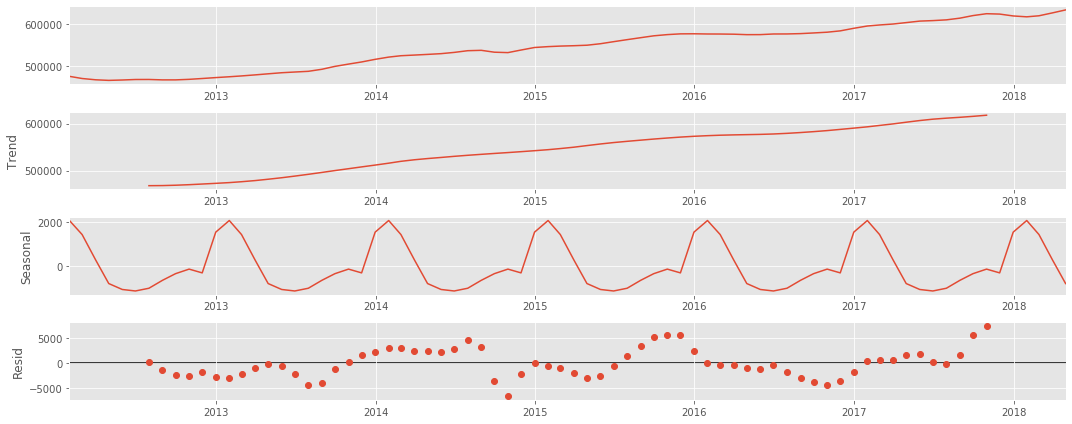

In [95]:
decompose_result = seasonal_decompose(zero_zero_four, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

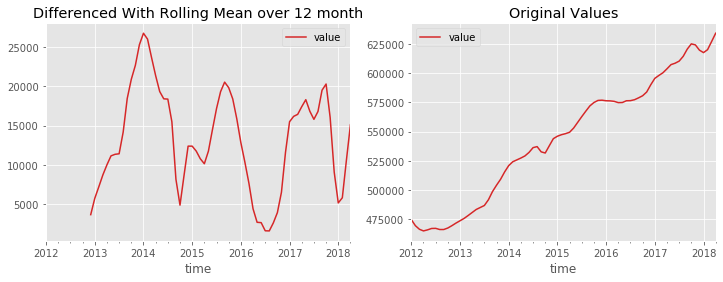

In [96]:
rolling_mean = zero_zero_four.rolling(window = 12).mean()
zero_zero_four_rolled_detrended = zero_zero_four - rolling_mean

ax1 = plt.subplot(121)
zero_zero_four_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
zero_zero_four.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

In [97]:
dftest = adfuller(zero_zero_four_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.829867300513149
2. P-Value :  0.0026160974222062166
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


In [98]:
zero_zero_four = zero_zero_four_rolled_detrended

### SARIMAX Modeling: Parameter Selection

In [99]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [100]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zero_zero_four,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - SARIMAX

In [101]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [102]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (1, 2, 2), 'pdqs': (1, 2, 2, 12), 'aic': 432.19676711888724}

In [103]:
best_params['pdq']

(1, 2, 2)

In [104]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zero_zero_four, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(1, 2, 2)x(1, 2, 2, 12)   Log Likelihood                -209.098
Date:                            Mon, 21 Dec 2020   AIC                            432.197
Time:                                    22:09:24   BIC                            440.145
Sample:                                01-31-2012   HQIC                           434.196
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5217      0.281      1.856      0.063      -0.029       1.073
ma.L1         -0.0005     31.923  -1.55e-05      1.000     -62.568      62.567
ma.L2         -1.0002      3.105     -0.322      0.747      -7.085       5.085
ar.S.L12      -0.6745      0.589     -1.146      0.252      -1.828       0.479
ma.S.L12      -1.1814      3.478     -0.340      0.734      -7.998       5.635
ma.S.L24      -0.0544      1.721     -0.032      0.975      -3.427       3.318
sigma2      2.701e+06   4.36e-06   6.19e+11      0.000     2.7e+06     2.7e+06
===================================================================================
Ljung-Box (Q):                       15.90   Jarque-Bera (JB):                 1.23
Prob(Q):                              0.82   Prob(JB):                         0.54
Heteroskedasticity (H):               0.96   Skew:                             0.42
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.62e+29. Standard errors may be unstable.
"""

### Plot Diagnostics

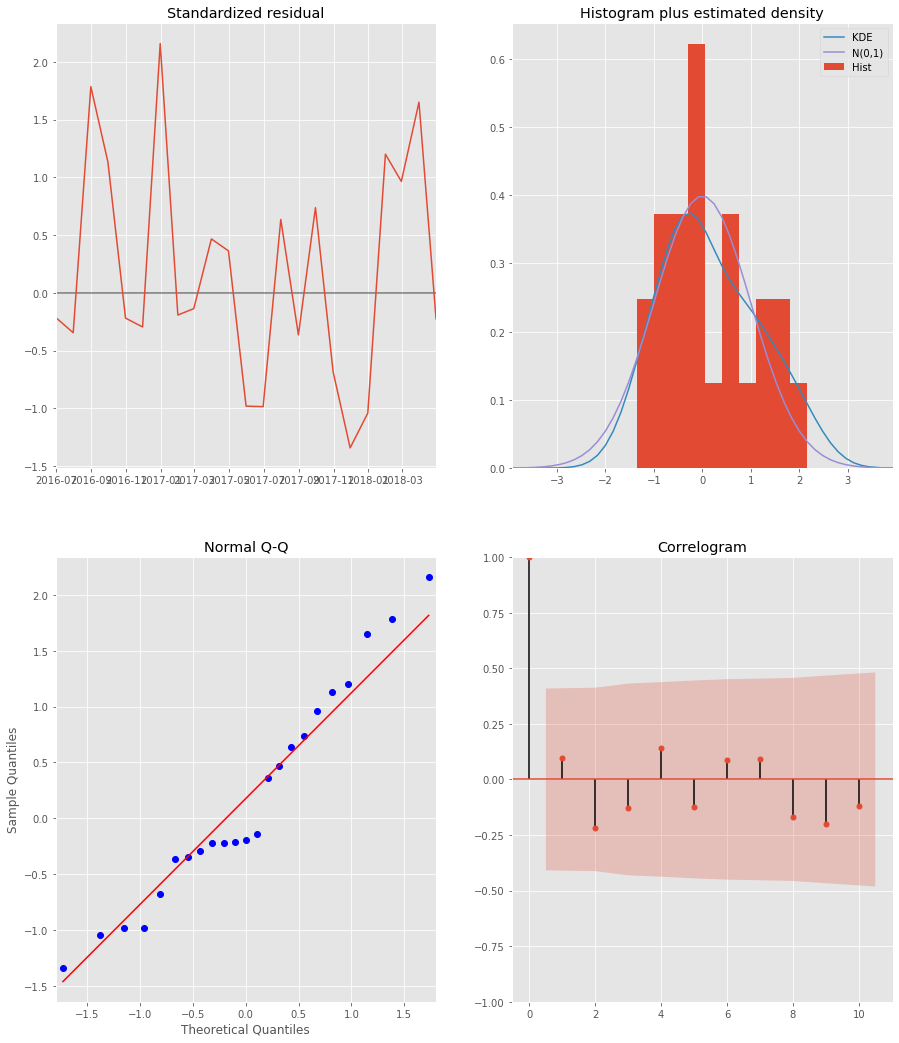

In [105]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [106]:
zero_zero_four[60:]

,value
time,
2017-01-31,15491.666667
2017-02-28,16175.000000
2017-03-31,16433.333333
2017-04-30,17416.666667
2017-05-31,18308.333333
2017-06-30,16825.000000
2017-07-31,15800.000000
2017-08-31,16800.000000
2017-09-30,19516.666667


In [107]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

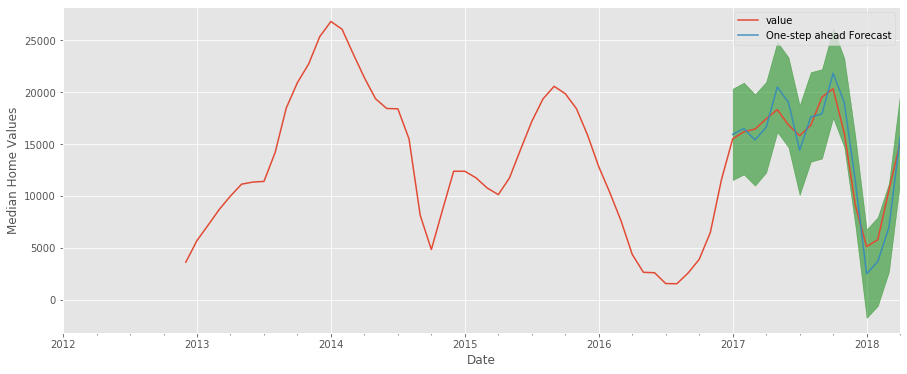

In [108]:

rcParams['figure.figsize'] = 15, 6

ax = zero_zero_four['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [109]:
val_forecasted = pred.predicted_mean
val_truth = zero_zero_four.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3570678.65


### Model Validation - Dynamic Forecasting

In [110]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()


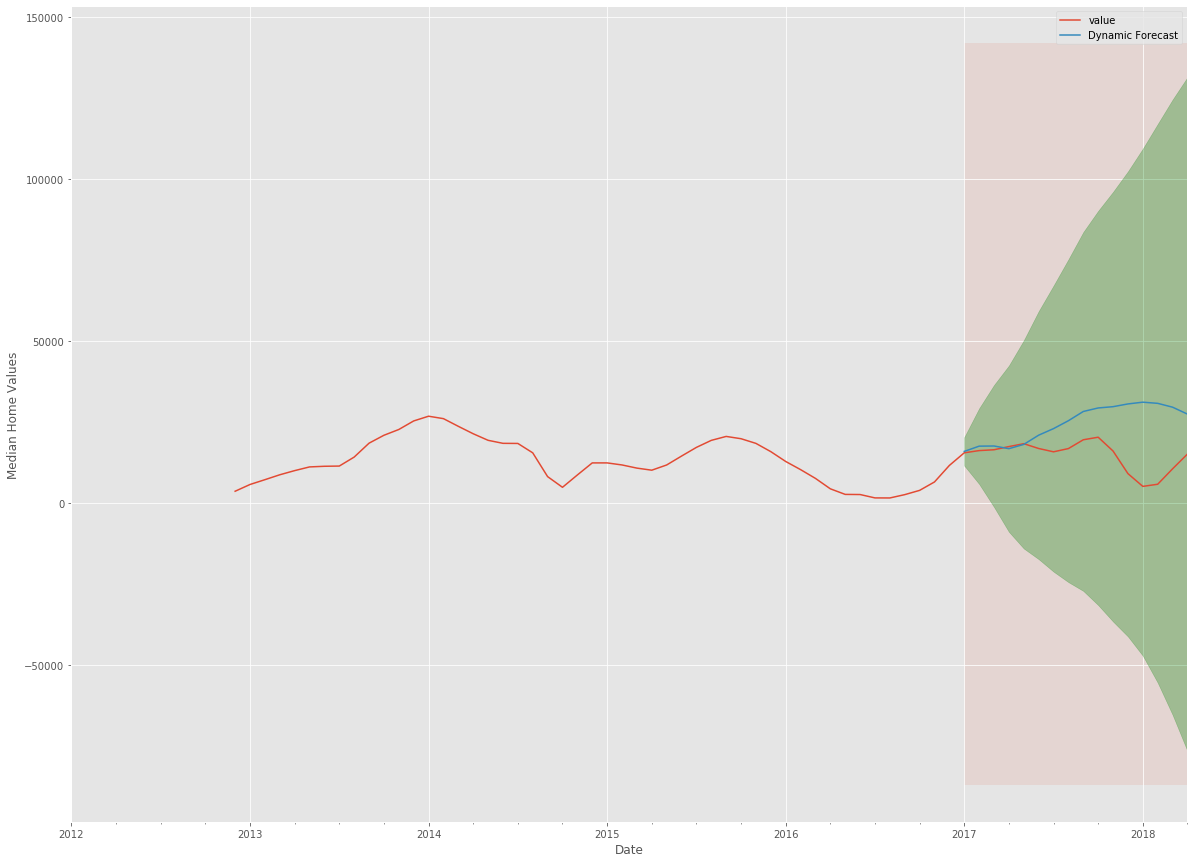

In [111]:
ax = zero_zero_four['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [112]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = zero_zero_four.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 173064929.65


### Visualizing Confidence Interval

In [113]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,13150.530123,21615.130817,17382.830470
2018-06-30,6805.783566,29529.489783,18167.636674
2018-07-31,-419.883855,35967.885666,17774.000906
2018-08-31,-5547.789316,43595.678490,19023.944587
2018-09-30,-8309.754766,52696.928089,22193.586661


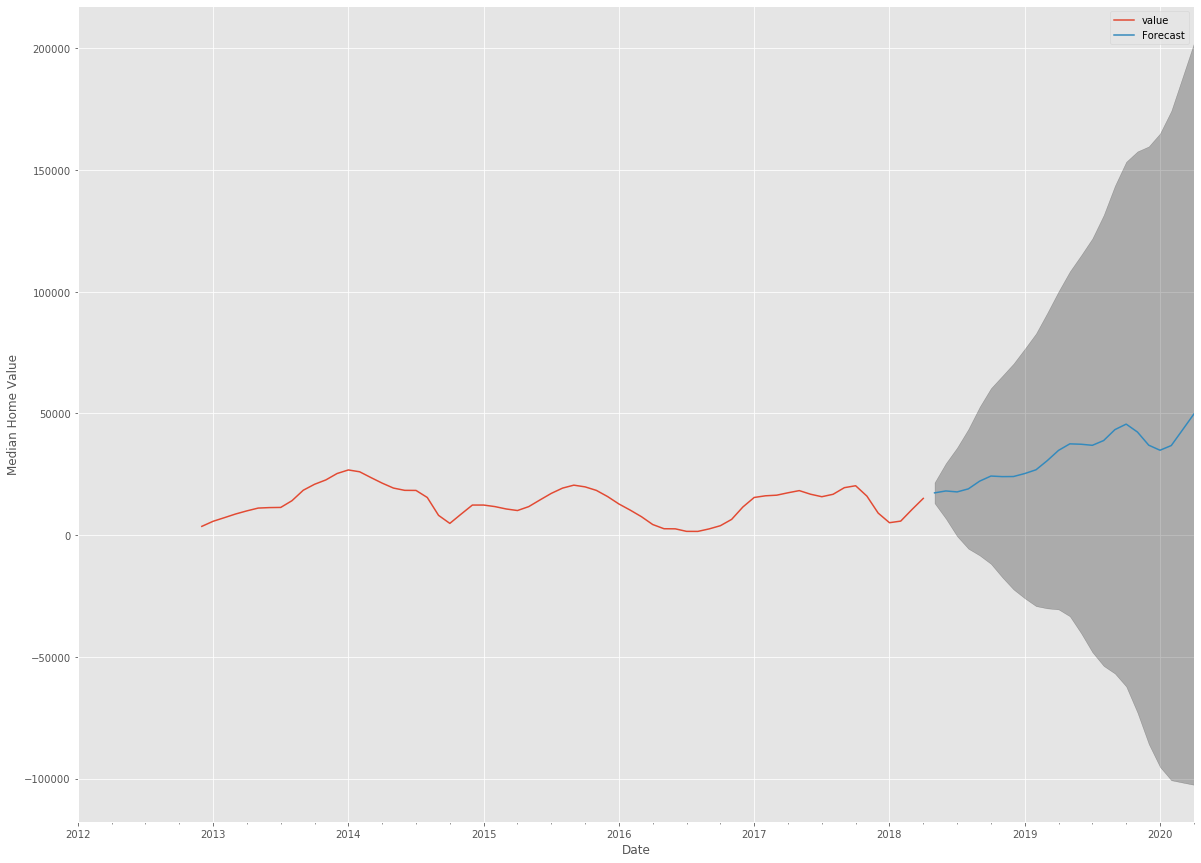

In [114]:
ax = zero_zero_four.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI) Percentage

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [115]:
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ cost * 100

roi


,lower value,upper value,mean
2018-05-31,-24.347590,24.347590,0.000000
2018-06-30,-60.847668,69.877339,4.514836
2018-07-31,-102.415509,106.916162,2.250326
2018-08-31,-131.915339,150.797352,9.441006
2018-09-30,-147.804382,203.155048,27.675333
2018-10-31,-167.714541,247.170256,39.727858
2018-11-30,-199.340669,276.099602,38.379467
2018-12-31,-228.084036,305.263086,38.589525
2019-01-31,-249.066095,340.326578,45.630242
2019-02-28,-267.521719,376.575655,54.526968


# Results Dataframe

In [116]:
results.AIC[11] = 432.19
results.Investment_Required[11] = 634300
results.ROI_Percentage[11] = 186.107
results

,Zipcode,AIC,Investment_Required,ROI_Percentage
0,11385,419,657500,211
1,11414,431,669800,24
2,11378,415,696100,-25
3,11421,431,547100,24
4,11418,425,611500,481
5,11423,400,533400,107
6,11369,425,675700,481
7,11417,406,510000,-82
8,11427,420,587700,1438715
9,11426,418,604400,-333


# Pickling the results Dataframe

In [117]:
results.to_pickle("./newest_results.pkl")